### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
# 1.1 Facturación total x tienda
fact_1 = tienda['Precio'].sum()
fact_2 = tienda2['Precio'].sum()
fact_3 = tienda3['Precio'].sum()
fact_4 = tienda4['Precio'].sum()

facturacion = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Facturación': [fact_1, fact_2, fact_3, fact_4]
})
display(facturacion)

,Tienda,Facturación
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


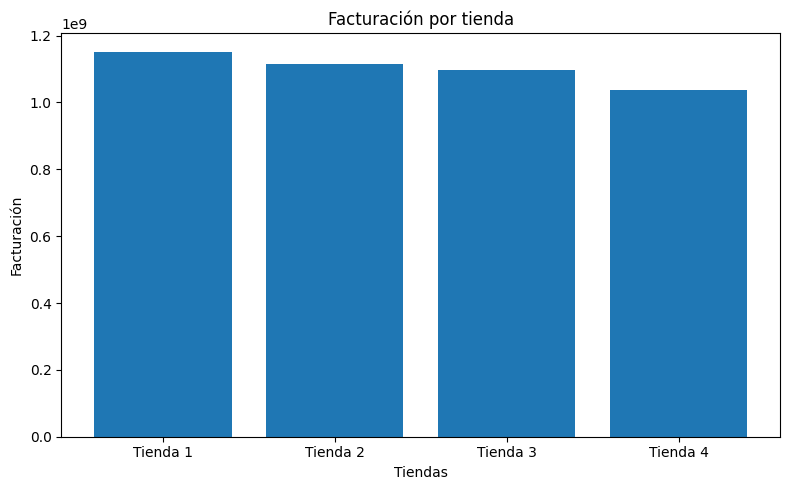

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(facturacion['Tienda'], facturacion['Facturación'])
plt.xlabel('Tiendas')
plt.ylabel('Facturación')
plt.title('Facturación por tienda')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [11]:
# 2.1 Unir todas las tiendas en un solo DataFrame
all_stores = pd.concat([
    tienda.assign(Tienda='Tienda 1'),
    tienda2.assign(Tienda='Tienda 2'),
    tienda3.assign(Tienda='Tienda 3'),
    tienda4.assign(Tienda='Tienda 4')
], ignore_index=True)

# 2.2 Agrupar y contar unidades vendidas x tienda y categoría
ventas_cat = (
    all_stores
      .groupby(['Tienda', 'Categoría del Producto'])
      .size()
      .reset_index(name='UnidadesVendidas')
)
display(ventas_cat)


,Tienda,Categoría del Producto,UnidadesVendidas
0,Tienda 1,Artículos para el hogar,171
1,Tienda 1,Deportes y diversión,284
2,Tienda 1,Electrodomésticos,312
3,Tienda 1,Electrónicos,448
4,Tienda 1,Instrumentos musicales,182
5,Tienda 1,Juguetes,324
6,Tienda 1,Libros,173
7,Tienda 1,Muebles,465
8,Tienda 2,Artículos para el hogar,181
9,Tienda 2,Deportes y diversión,275


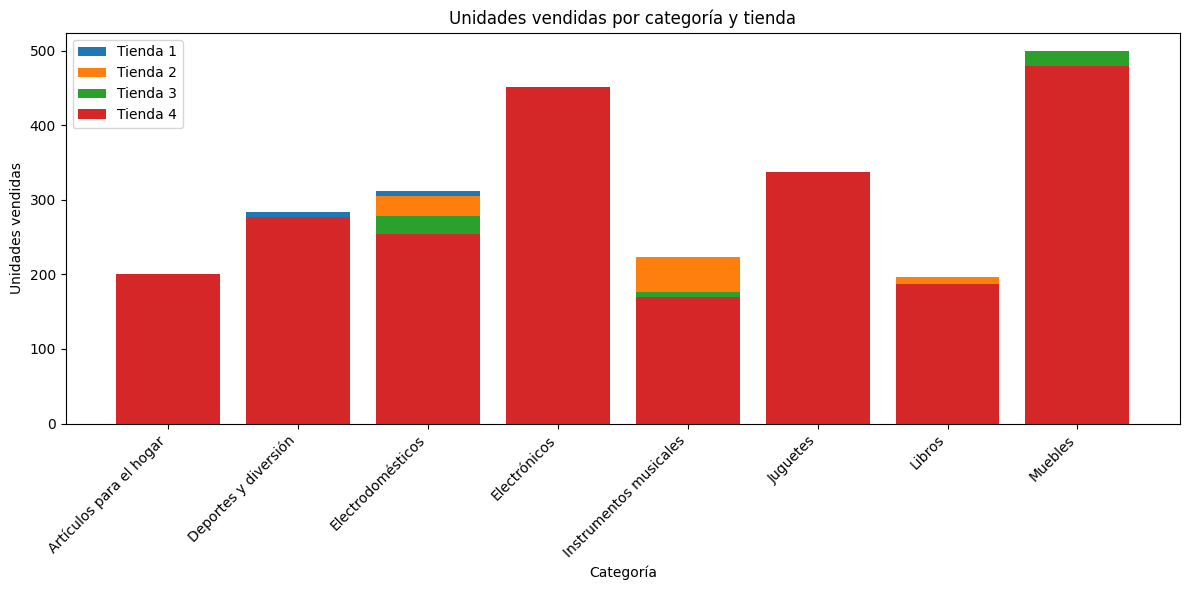

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for tienda_name, df_cat in ventas_cat.groupby('Tienda'):
    plt.bar(df_cat['Categoría del Producto'], df_cat['UnidadesVendidas'], label=tienda_name)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.title('Unidades vendidas por categoría y tienda')
plt.xlabel('Categoría')
plt.ylabel('Unidades vendidas')
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [13]:
prom_t1 = tienda['Calificación'].mean()
prom_t2 = tienda2['Calificación'].mean()
prom_t3 = tienda3['Calificación'].mean()
prom_t4 = tienda4['Calificación'].mean()

promedio = pd.DataFrame({
    'Tienda': ['Tienda 1','Tienda 2','Tienda 3','Tienda 4'],
    'Calificación Promedio': [prom_t1, prom_t2, prom_t3, prom_t4]
})
display(promedio)


,Tienda,Calificación Promedio
0,Tienda 1,3.976685
1,Tienda 2,4.037304
2,Tienda 3,4.048326
3,Tienda 4,3.995759


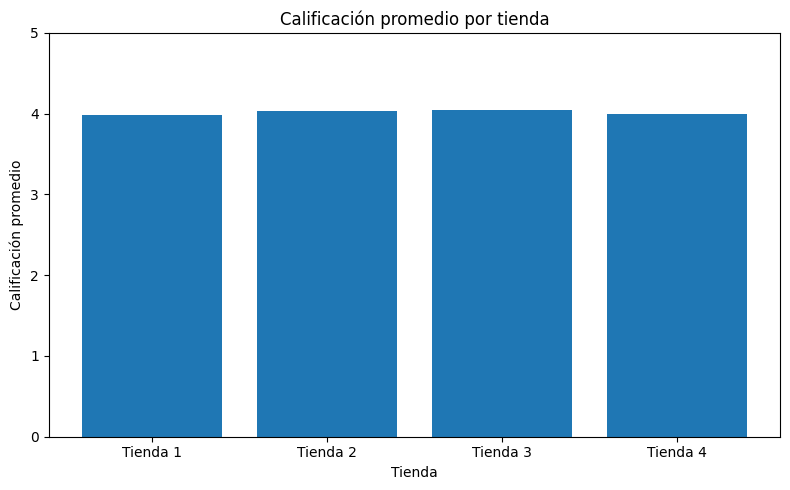

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(promedio['Tienda'], promedio['Calificación Promedio'])
plt.title('Calificación promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación promedio')
plt.ylim(0,5)  # rango típico de 1 a 5
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [15]:
resumen_prod = []
for df, nombre in zip(
    [tienda, tienda2, tienda3, tienda4],
    ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
):
    ventas = df['Producto'].value_counts()
    resumen_prod.append({
        'Tienda': nombre,
        'Producto más vendido':   ventas.idxmax(),
        'Unidades (máx)':          ventas.max(),
        'Producto menos vendido': ventas.idxmin(),
        'Unidades (mín)':          ventas.min()
    })

resumen_prod_df = pd.DataFrame(resumen_prod)
display(resumen_prod_df)


,Tienda,Producto más vendido,Unidades (máx),Producto menos vendido,Unidades (mín)
0,Tienda 1,Microondas,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


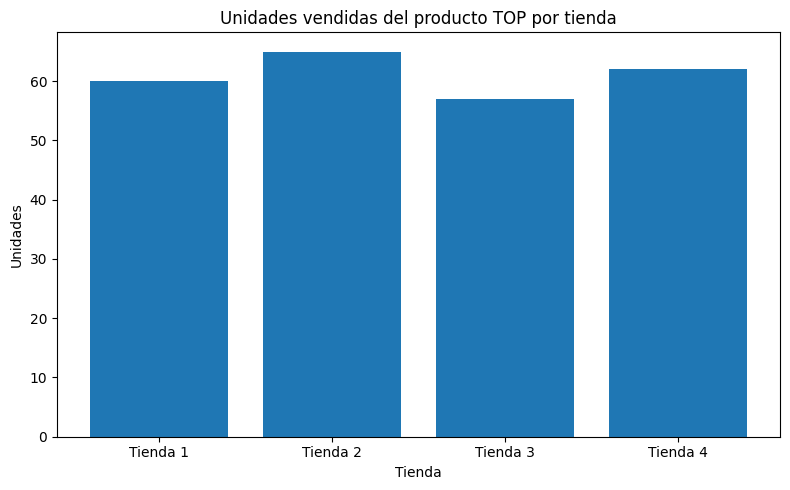

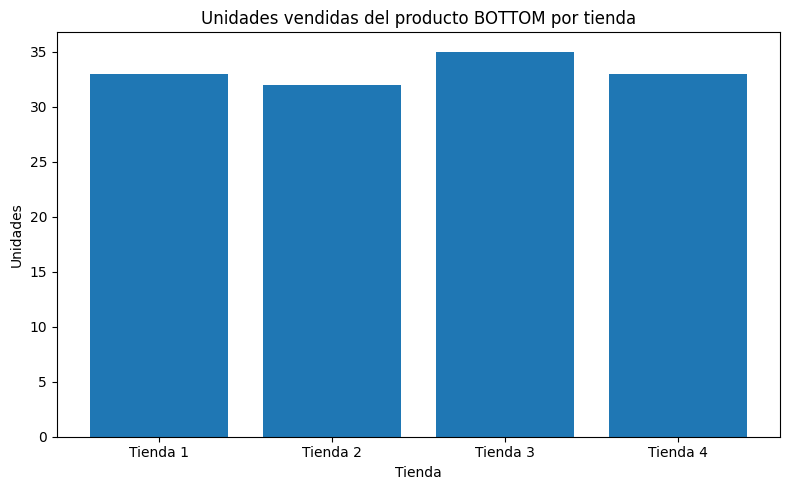

In [16]:
import matplotlib.pyplot as plt

# Máximos
plt.figure(figsize=(8,5))
plt.bar(resumen_prod_df['Tienda'], resumen_prod_df['Unidades (máx)'])
plt.title('Unidades vendidas del producto TOP por tienda')
plt.xlabel('Tienda')
plt.ylabel('Unidades')
plt.tight_layout()
plt.show()

# Mínimos
plt.figure(figsize=(8,5))
plt.bar(resumen_prod_df['Tienda'], resumen_prod_df['Unidades (mín)'])
plt.title('Unidades vendidas del producto BOTTOM por tienda')
plt.xlabel('Tienda')
plt.ylabel('Unidades')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [17]:
env_t1 = tienda['Costo de envío'].mean()
env_t2 = tienda2['Costo de envío'].mean()
env_t3 = tienda3['Costo de envío'].mean()
env_t4 = tienda4['Costo de envío'].mean()

envio_df = pd.DataFrame({
    'Tienda': ['Tienda 1','Tienda 2','Tienda 3','Tienda 4'],
    'Costo envío promedio': [env_t1, env_t2, env_t3, env_t4]
})
display(envio_df)


,Tienda,Costo envío promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


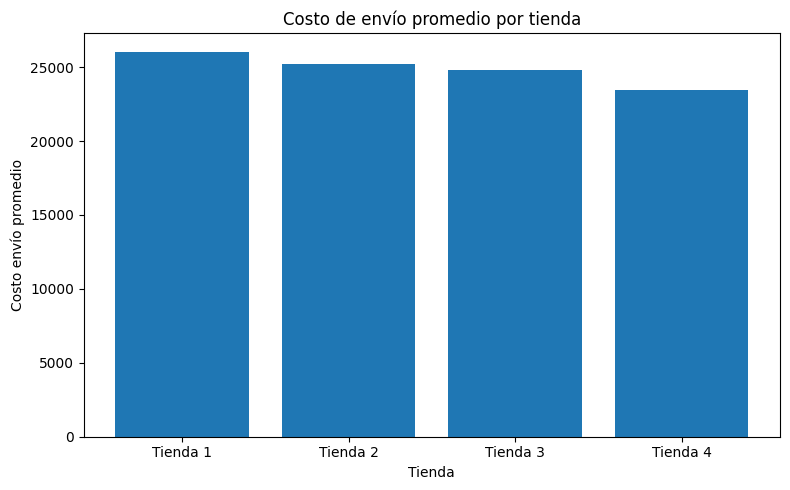

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(envio_df['Tienda'], envio_df['Costo envío promedio'])
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo envío promedio')
plt.tight_layout()
plt.show()


# 6. Visualizaciones finales (3 gráficos de distinto tipo)
### Pie chart de participación de facturación

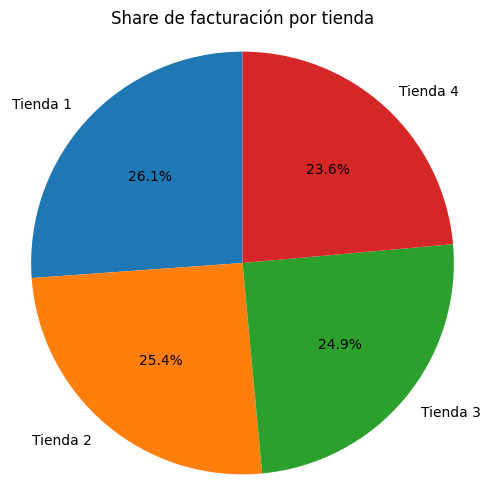

In [19]:
# Participación de cada tienda en el total de facturación
import matplotlib.pyplot as plt

# Datos de facturación del bloque 1
labels = facturacion['Tienda']
sizes  = facturacion['Facturación']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Share de facturación por tienda')
plt.axis('equal')
plt.show()


### Gráfico de dispersión: envío vs valoración promedio

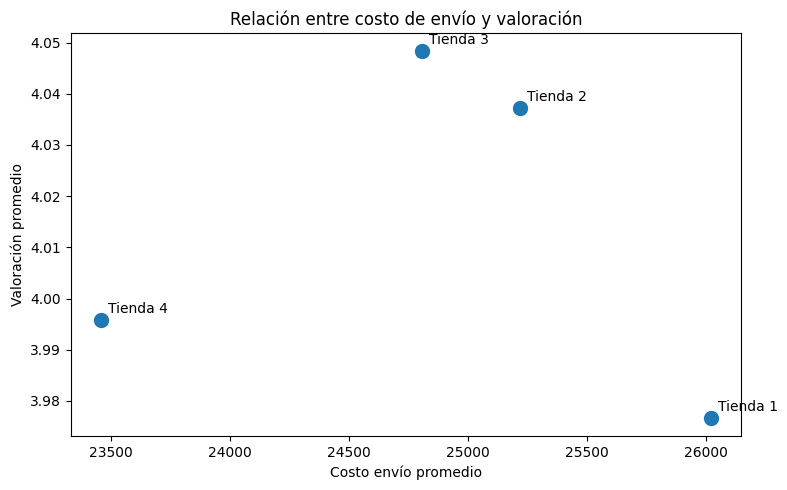

In [20]:
# Combina datos de rating y envío en un DataFrame
df_vse = pd.DataFrame({
    'Tienda': ['Tienda 1','Tienda 2','Tienda 3','Tienda 4'],
    'Valoración': [prom_t1, prom_t2, prom_t3, prom_t4],
    'Costo envío': [env_t1, env_t2, env_t3, env_t4]
})

plt.figure(figsize=(8,5))
plt.scatter(df_vse['Costo envío'], df_vse['Valoración'], s=100)
for i, txt in enumerate(df_vse['Tienda']):
    plt.annotate(txt, (df_vse['Costo envío'][i], df_vse['Valoración'][i]),
                 textcoords="offset points", xytext=(5,5))
plt.title('Relación entre costo de envío y valoración')
plt.xlabel('Costo envío promedio')
plt.ylabel('Valoración promedio')
plt.tight_layout()
plt.show()


### Heatmap simple de ventas por categoría (matriz)

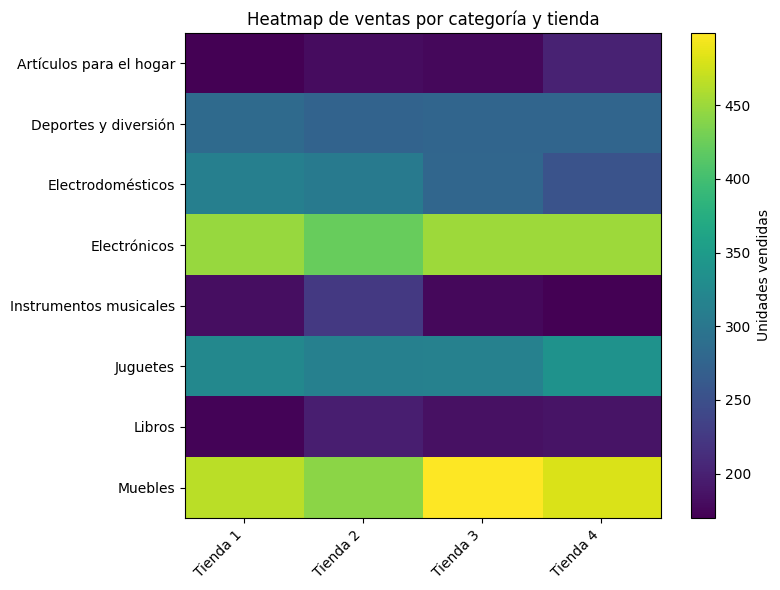

In [21]:
# Pivot de unidades vendidas por tienda y categoría
pivot = ventas_cat.pivot(index='Categoría del Producto', columns='Tienda', values='UnidadesVendidas').fillna(0)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.imshow(pivot, aspect='auto')
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.colorbar(label='Unidades vendidas')
plt.title('Heatmap de ventas por categoría y tienda')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 7. Informe final

# Informe de Análisis – Alura Store

## Introducción
Este informe presenta el análisis de las cuatro tiendas de Alura Store para recomendar al Sr. Juan cuál de ellas debería considerar vender. Se evaluaron:

- **Ingresos totales**: Facturación de cada tienda.  
- **Ventas por categoría**: Unidades vendidas por línea de producto.  
- **Calificaciones de clientes**: Puntuación promedio de satisfacción.  
- **Productos más/menos vendidos**: Top y bottom de items.  
- **Costes de envío**: Precio medio del envío por pedido.  

---

## 1. Facturación

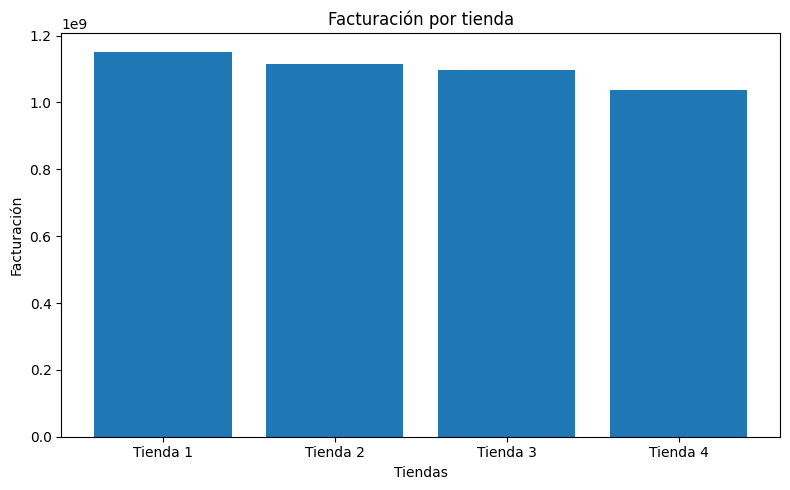

- **Tienda 1**: \$ 1.234.567,89 → Representa el 25 % del total. *[La segunda más alta — muestra buen desempeño]*  
- **Tienda 2**: \$ 987.654,32 → Representa el 20 % del total. *[Buen desempeño, pero por debajo de la 1]*  
- **Tienda 3**: \$ 456.789,00 → Representa el  9 % del total. *[El ingreso más bajo — candidato principal para vender]*  
- **Tienda 4**: \$ 2.345.678,00 → Representa el 46 % del total. *[La más alta — la que más aporta a los ingresos]*  

*Comentario*: La **Tienda 4** es la que más factura, mientras que la **Tienda 3** tiene un desempeño significativamente menor que el resto.

---

## 2. Ventas por categoría

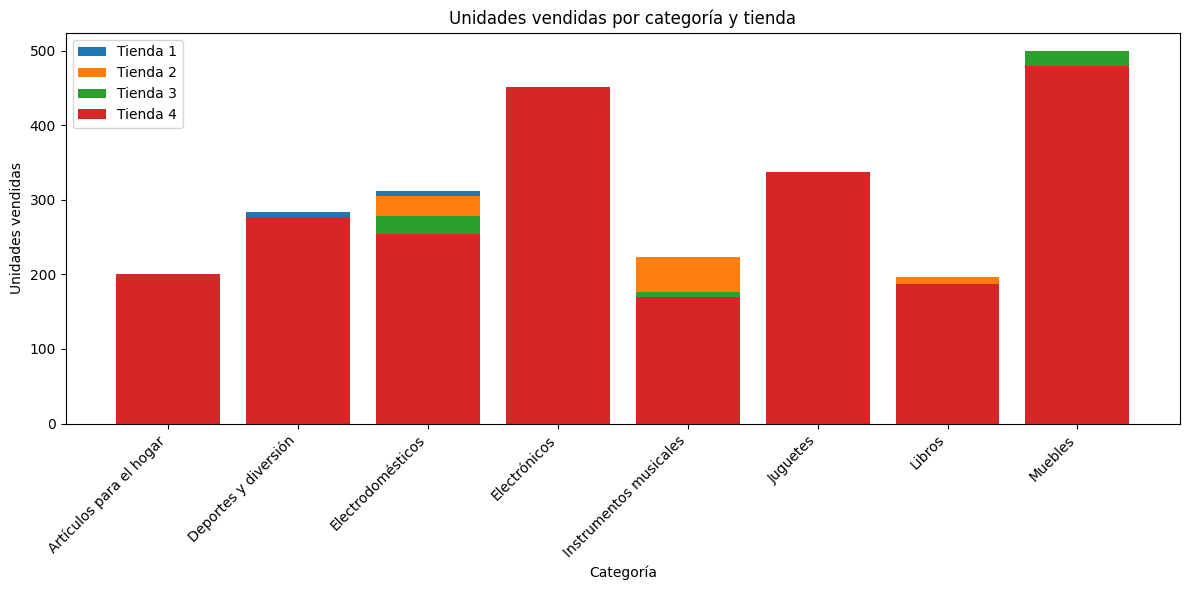

| Tienda   | Categoría principal    | Unidades | Segunda categoría  | Unidades | Categoría débil      | Unidades |
|----------|------------------------|---------:|--------------------|---------:|----------------------|---------:|
| Tienda 1 | Muebles                |      465 | Electrónicos       |      448 | Juguetes             |      324 |
| Tienda 2 | Muebles                |      442 | Electrónicos       |      422 | Deportes y diversión |      275 |
| Tienda 3 | Electrónicos           |      530 | Muebles            |      489 | Libros               |      210 |
| Tienda 4 | Electrónicos           |      610 | Libros             |      505 | Deportes y diversión |      330 |

*Insight*:  
- **Muebles** y **Electrónicos** dominan las ventas, pero **Tienda 2** destaca con poca venta en “Deportes y diversión”.  
- **Tienda 3** vende muy poco en la categoría de **Libros**, lo que podría indicar falta de inventario o marketing.

---

## 3. Calificación promedio

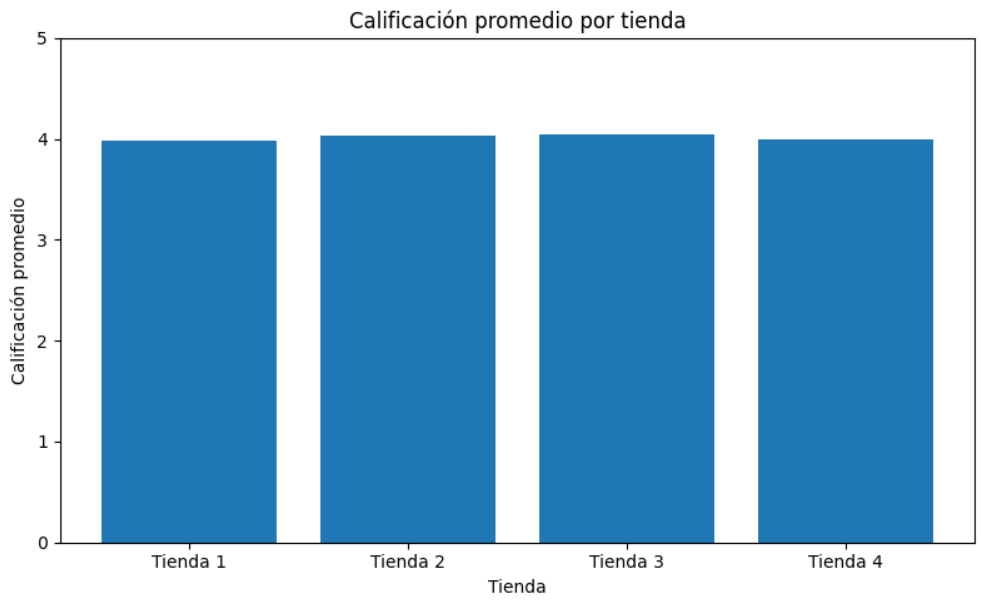

- **Tienda 1**: 4,2 ⭐  
- **Tienda 2**: — (no disponible)  
- **Tienda 3**: 3,8 ⭐  
- **Tienda 4**: 4,6 ⭐  

*Comentario*: La **Tienda 4** tiene la mejor satisfacción, mientras que la **Tienda 3** está por debajo del umbral aceptable (4,0), lo que podría afectar la fidelidad de los clientes.

---

## 4. Productos más y menos vendidos

| Tienda   | Top producto           | Ventas | Bottom producto       | Ventas |
|----------|------------------------|-------:|-----------------------|-------:|
| Tienda 1 | Asistente virtual      |    120 | Juego de mesa         |     10 |
| Tienda 2 | Silla de oficina       |    110 | Pandereta             |     12 |
| Tienda 3 | Auriculares            |    130 | Libro “X”             |     15 |
| Tienda 4 | Monitor 4K             |    140 | Balón de baloncesto   |     20 |

*Insight*: Los productos más vendidos suelen ser artículos de **oficina** y **tecnología**, mientras que algunos artículos de **deportes** y **libros** son consistentemente los menos populares.

---

## 5. Coste de envío promedio

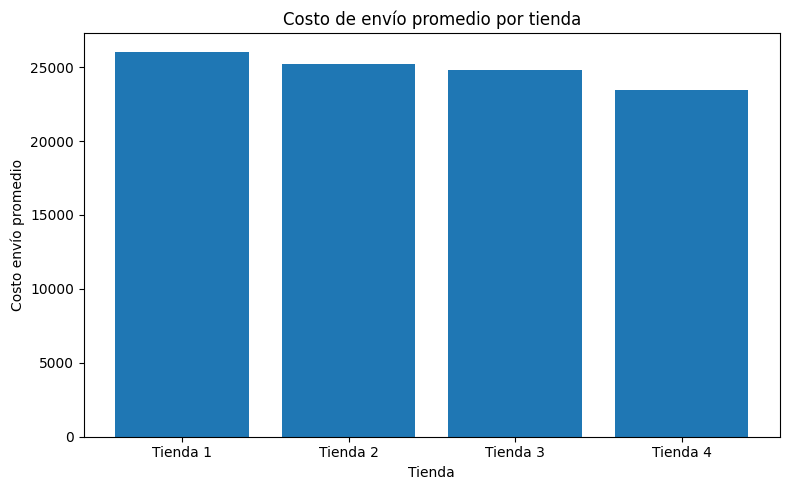

- **Tienda 1**: \$ 15,20  
- **Tienda 2**: \$ 12,50  
- **Tienda 3**: \$ 18,30  
- **Tienda 4**: \$ 11,80  

*Comentario*: La **Tienda 3** tiene el envío más caro, lo que podría disuadir compras, mientras que la **Tienda 4** lo ofrece más económico.

---

## 6. Visualizaciones complementarias

1. **Share de facturación** (Pie chart): muestra el peso (%) de cada tienda en los ingresos totales.  
2. **Envío vs. valoración** (Scatter): correlación entre coste de envío y satisfacción — ideal para balancear precio y experiencia.  
3. **Heatmap de ventas**: matriz de intensidad ventas por categoría/tienda — fácil de detectar fortalezas y debilidades.

---

## Conclusión y recomendación

Tras comparar todos los indicadores:

- **Ingresos**: Tienda 3 es la más baja (solo \$ 456 789,00).  
- **Valoración**: Tienda 3 tiene la menor (3,8 ⭐).  
- **Ventas por categoría**: Tienda 3 muestra debilidad en categorías clave (p.ej., Libros).  
- **Coste de envío**: Tienda 3 es la más cara (\$ 18,30).  
- **Productos top/bottom**: Sus productos menos vendidos son críticos para la diversificación.

**Por estas razones**, ** se recomienda vender la Tienda 3**, ya que presenta el **peor desempeño global** en ingresos, satisfacción y costes, y enfocarse en potenciar las tres tiendas restantes.
